<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y1=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y[position]) 

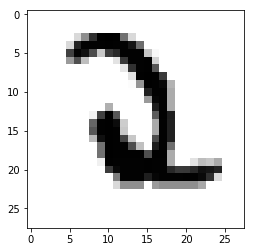

2


In [4]:
show_imag(X,y1,400)

In [0]:
def convert_binary(y):
  y1=np.zeros((len(y),10))
  for i in range(len(y)):
    y1[i][int(y[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [32]:
y=convert_binary(y1)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
ETheta=np.random.rand(NumHunits+1,s)
z[0]=np.matmul(X_with_bias,ITheta)
a[0]=1/(1+np.exp(-1*z[0]))
hidden[0]=np.c_[np.ones((m,1)),a[0]]
for i in range(NumHlayers-1):
  z[i+1]=np.matmul(hidden[i],HTheta[i])
  a[i+1]=1/(1+np.exp(-1*z[i+1]))
  hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
print(pred[999],y[999])
dpred=pred-y
print(dpred[999],ETheta.shape,dpred.shape)
d[NumHlayers-1]=np.transpose(np.matmul(ETheta,np.transpose(dpred)))
#*(a[NumHlayers]*(1-a[NumHlayers]))
print(d[NumHlayers-1],d[NumHlayers-1].shape,hidden[NumHlayers-1].shape)
#for

[0.99999982 0.99999809 0.99999996 1.         0.99999999 0.99999974
 0.99999995 0.9999997  0.99999981 0.99999981] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[ 9.99999822e-01  9.99998086e-01  9.99999958e-01  9.99999996e-01
  9.99999991e-01  9.99999736e-01 -4.59345370e-08  9.99999701e-01
  9.99999811e-01  9.99999813e-01] (31, 10) (1000, 10)
[[5.4371679  2.95452558 5.20396871 ... 3.96044312 4.88743172 4.35013347]
 [5.98761309 2.29234595 4.62431232 ... 4.31143835 4.92787489 3.93036259]
 [5.92091209 2.95564413 4.69924923 ... 3.71264759 5.26401465 3.79965493]
 ...
 [5.98761309 2.29234595 4.62431232 ... 4.31143835 4.92787489 3.93036259]
 [5.42292677 2.32412378 4.82152452 ... 3.90961375 5.26666464 3.59231624]
 [5.9069895  2.98526799 4.40387993 ... 3.93502494 4.98169465 4.09194244]] (1000, 31) (1000, 31)


In [8]:
print(y[5],y1[5])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
